In [4]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#from skimage import io
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
#Load dataset
dataset = pd.read_csv("data/ML_data_EtOH_01102022.csv")

indices=[0,12,17]  #1st validation trial
mapped = map(dataset.Electrophile.unique().tolist().__getitem__, indices)
external_list=list(mapped)
ML_data_validation = dataset[dataset['Electrophile'].isin(external_list)]
ML_data_validation2 = ML_data_validation.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)

exclude_list = ML_data_validation.index.values.tolist()

In [7]:
#All files
#!ls ./Results/All_4/data/*.txt

In [8]:
pd.read_csv('./Results/All_4/data/_146_data.txt', header=None, sep='\t')

,0,1,2,3,4,5,6,7,8,9,10,11
0,26.658530,18.724091,62.712637,8.710573,2.273737e-13,149.175006,109.831145,166.007045,72.735609,144.109027,32.547043,20.015147
1,37.475484,26.979405,129.524313,106.310279,7.059541e+01,1.120480,106.836714,197.706636,70.054945,196.568743,196.291387,128.881569
2,207.019216,200.113367,143.097026,75.343553,1.153272e+02,213.374061,201.104550,137.430894,149.918668,168.994083,189.574779,230.870227
3,43.019088,153.758432,157.052108,214.200000,1.050000e+02,204.000000,106.961297,175.866395,138.125000,23.784404,149.531250,255.000000
4,218.833583,221.739130,66.772131,255.000000,9.479520e+01,224.272140,38.616075,188.419665,141.666667,216.865623,53.684211,255.000000
5,230.714286,71.978077,233.290912,229.516151,2.408734e+02,233.700883,236.064549,238.387708,223.143087,204.654955,168.542101,45.000000
6,105.858390,255.000000,238.199244,132.136464,2.464034e+02,68.179677,202.934293,119.877137,111.563831,107.600009,122.289952,28.333333
7,72.857143,255.000000,188.291280,226.254296,2.112634e+02,223.767983,153.168392,137.388260,100.549434,106.441458,221.752239,255.000000
8,255.000000,97.148577,197.792838,236.698495,1.730016e+02,139.497753,49.885043,147.516228,110.615385,45.107406,178.811082,144.448254
9,63.255830,150.628662,161.539993,90.533072,1.849224e+02,174.776333,80.617310,101.921288,120.890218,199.236830,255.000000,186.167544


In [9]:
WIDTH = 12
HEIGHT = 13
train_images = []
train_y = []
test_images = []
test_y = []
for imageName in glob.glob('./Results/All_4/data/*.txt'):
    row_index=imageName.split('/')[4].split('_')[1]
    if int(row_index) in exclude_list:
        img = np.array(pd.read_csv(imageName, header=None, sep='\t'))
        img = img.reshape([WIDTH, HEIGHT, 1])
        test_images.append(img)
        test_y.append(dataset.loc[int(row_index),'Yield']/100)
    else:
        img2 = np.array(pd.read_csv(imageName, header=None, sep='\t'))
        img2 = img2.reshape([WIDTH, HEIGHT, 1])
        train_images.append(img2)
        train_y.append(dataset.loc[int(row_index),'Yield']/100)

x_train = np.array(train_images)
y_train = np.array(train_y)

x_test = np.array(test_images)
y_test = np.array(test_y)

In [10]:
x_train.shape, x_test.shape

((549, 12, 13, 1), (69, 12, 13, 1))

In [11]:
y_train.shape, y_test.shape

((549,), (69,))

In [12]:
#y_train

In [13]:
# Model / data parameters
input_shape = (12, 13, 1)

In [14]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (549, 12, 13, 1, 1)
549 train samples
69 test samples


In [21]:
keras.backend.clear_session()

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(1, activation="LeakyReLU"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 11, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0

In [23]:
batch_size = 5
epochs = 30
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
99/99 [==============================] - 1s 3ms/step - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 2/30
99/99 [==============================] - 0s 2ms/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 3/30
99/99 [==============================] - 0s 2ms/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 4/30
99/99 [==============================] - 0s 2ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 5/30
99/99 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 6/30
99/99 [==============================] - 0s 2ms/step - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 7/30
99/99 [======================

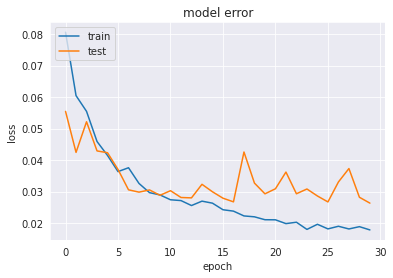

In [24]:
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)*100
    RMSE = np.sqrt(mean_squared_error(test_labels*100,predictions))
    r_sq = r2_score(test_labels*100,predictions)
    print('Model Performance')
    print('RMSE: {:0.2f}'.format(RMSE))
    print('R2: {:0.3f}'.format(r_sq))
    return RMSE,r_sq

evaluate(model, x_test, y_test)  

Model Performance
RMSE: 18.65
R2: 0.559


(18.649867320906374, 0.5590293962948337)

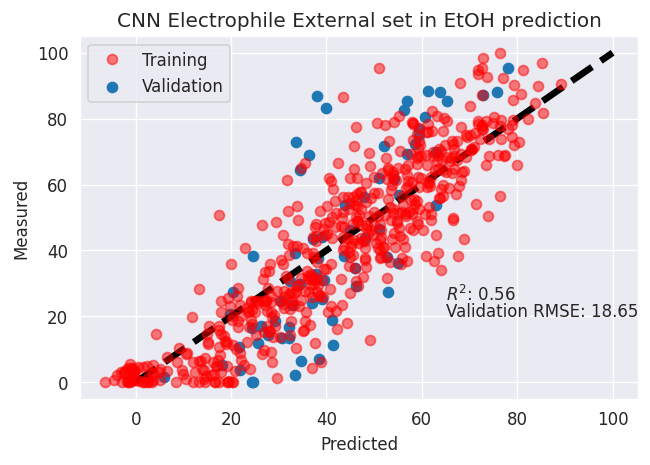

In [26]:
Pred=model.predict(x_test)
plt.rcParams['figure.dpi'] = 120
fig, ax = plt.subplots()
ax.scatter(Pred*100,y_test*100,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(model.predict(x_train)*100, y_train*100, "or", alpha=0.5, label="Training")
ax.text(65,25,r'$R^2$: {:0.2f}'.format(r2_score(y_test*100,Pred*100)))
ax.text(65,20,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(y_test*100,Pred*100))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('CNN Electrophile External set in EtOH prediction')
plt.legend()
plt.show()

In [27]:
import pickle

with open('CNN_EtOH_01142022.pkl','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://c6e02d89-ab38-42c1-b0f2-ea6c2ff77672/assets


INFO:tensorflow:Assets written to: ram://c6e02d89-ab38-42c1-b0f2-ea6c2ff77672/assets


In [29]:
import math

# load
with open('CNN_EtOH_01142022.pkl', 'rb') as f:
    clf2 = pickle.load(f)

pred=clf2.predict(x_test)*100
mse = mean_squared_error(y_test*100, pred)
print(math.sqrt(mse))

18.649867320906374


In [ ]:
results=ML_data_validation[['Electrophile','Ligand','Yield']]
results.reset_index(drop=True, inplace=True)
results['Pred_Yield']=Pred*100
results.to_csv("CNN_EtOH_prediction.csv",index=False)